In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/raw/CollegePlacement.csv')
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


# Description

In [6]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [8]:
data.describe(include='object')

,College_ID,Internship_Experience,Placement
count,10000,10000,10000
unique,100,2,2
top,CLG0062,No,No
freq,133,6036,8341


In [9]:
data.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [15]:
data.select_dtypes(include='object').columns

Index(['College_ID', 'Internship_Experience', 'Placement'], dtype='object')

In [12]:
cat = data.select_dtypes(include='object').columns

In [14]:
for i in cat:
    print(data[i].value_counts())

College_ID
CLG0062    133
CLG0027    120
CLG0075    119
CLG0065    119
CLG0023    118
          ... 
CLG0006     83
CLG0060     83
CLG0035     83
CLG0054     79
CLG0042     75
Name: count, Length: 100, dtype: int64
Internship_Experience
No     6036
Yes    3964
Name: count, dtype: int64
Placement
No     8341
Yes    1659
Name: count, dtype: int64


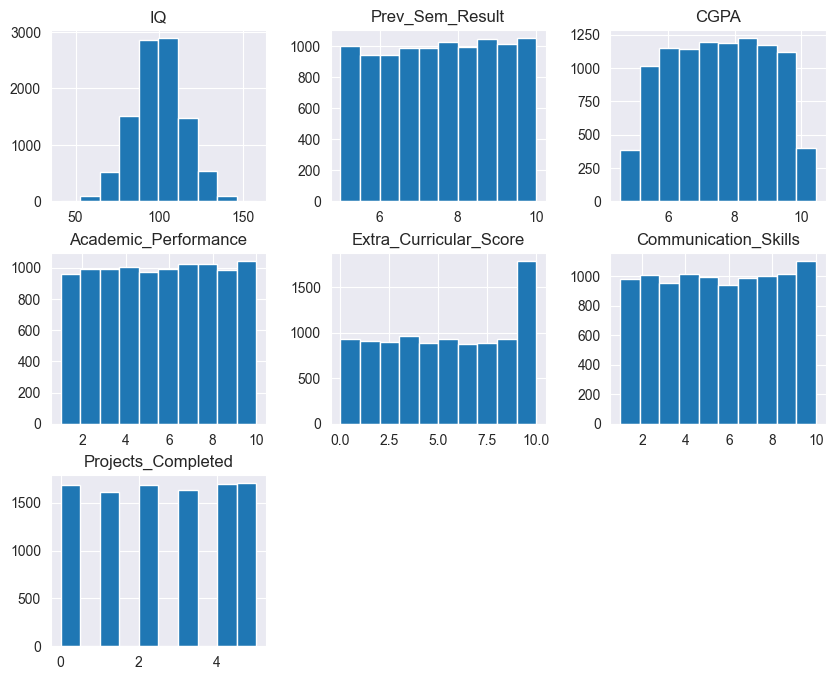

In [16]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols].hist(figsize=(10,8))
plt.show()

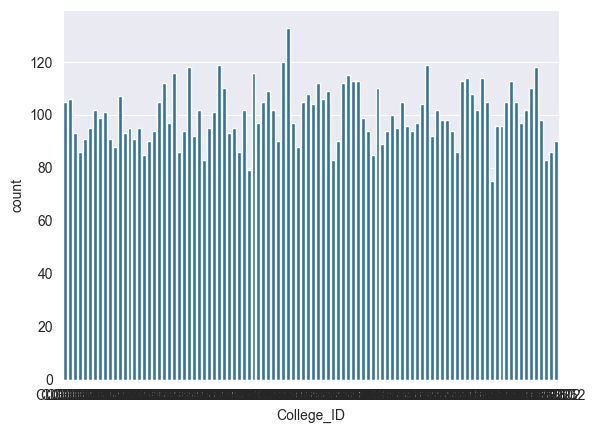

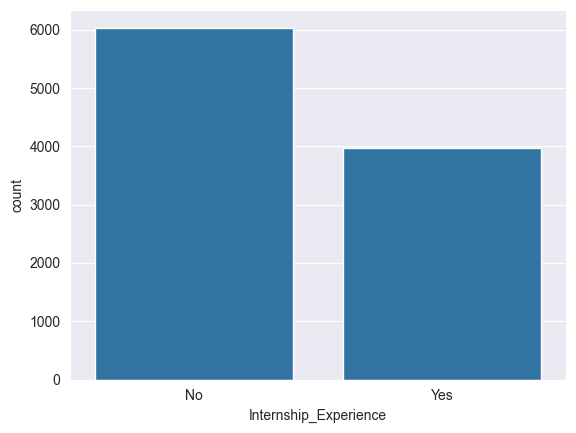

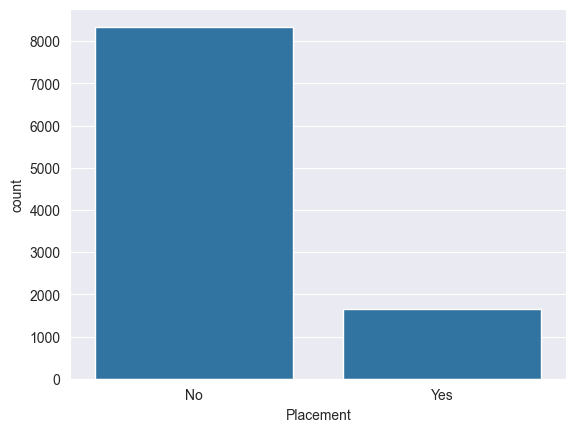

In [17]:
for col in cat:
    sns.countplot(data=data, x=col)
    plt.show()

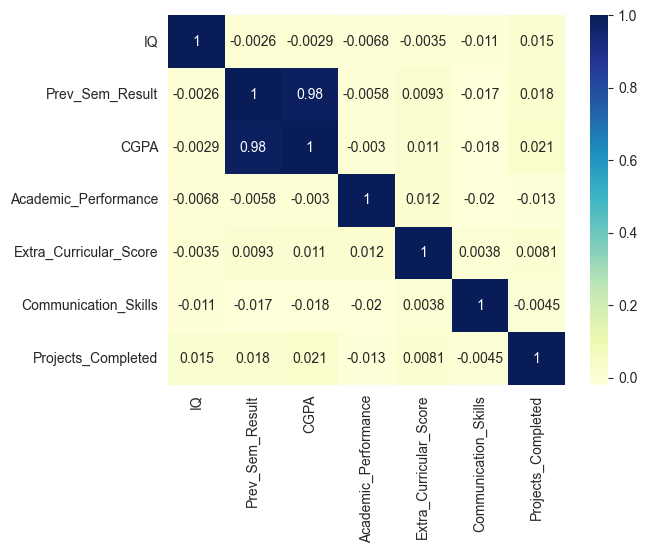

In [18]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

In [20]:
data.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

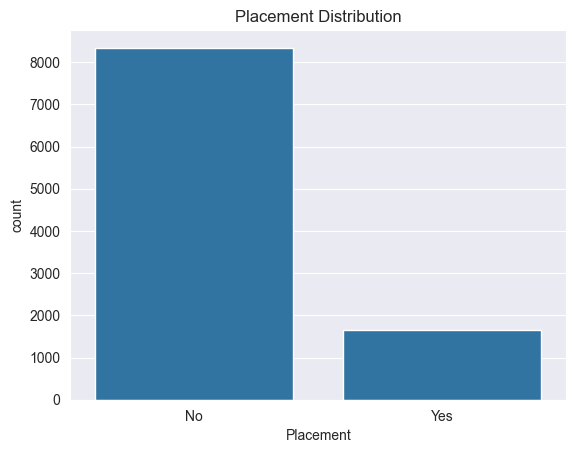

Placement
No     0.8341
Yes    0.1659
Name: proportion, dtype: float64


In [21]:
sns.countplot(data=data, x='Placement')
plt.title("Placement Distribution")
plt.show()

print(data['Placement'].value_counts(normalize=True))